## Принятие решений в бизнесе

**Описание проекта:**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


**План работы по проекту**

**Часть 1. Приоритизация гипотез.**
- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Опишем и объясним различия в результатах, если они будут 

**Часть 2. Анализ A/B-теста**

После проведенного А/В-теста, проведем его анализ, а именно:
- Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
- Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
- Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
- Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
- Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

- Примем решение по результатам теста и объясним его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных:**

**Данные для первой части**

Файл /datasets/hypothesis.csv.

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv.

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Итоговый вывод:

Итак, для того, чтобы принять решение, необходимо зарезюмировать весь ход оценки результатов А/В- теста:

- на протяжении всего теста группа В показывала стабильно лучше рельтат по выручке, чем группа А
- По графикам редний чек группы В был выше, чем средний чек группы А, но при проверке гипотез было установлено, что различия между ними если и есть, то очень минимальны (нулевая гипотеза о равенстве средних чеков между группами не была отвергнута) 
- Среднее количество заказов группы В так же стабильно выше чем у группы А (коллебания в данных не превышают 1-2%)
- несмотря на незначительные коллебания отношения конверсии группы В к группе А, она все равно остается стабильно выше 0 (то есть, стабильно выше конверсии группы А)
- Гипотеза о равенстве среднего количества заказов между группами была отвергнута в пользу альтернативной (различия между группами есть - p-value был ниже 0.05 как в сырых данных, так и после удаления выбросов)


Исходя из вышеперечисленных результатов, решение по результату:

Остановить тест, зафиксировать победу одной из групп (Группы В)

Даже если допустить, что данные еще не "прожили" достаточное кол-во времени, то мы уже видим четкое различие между группами и превосходство одной над другой по все параметрам. Смысла продолжать эксперимент нет, так как данные продолжат расти и либо увеличат разрыв между собой, либо останутся на том же уровне 

## Ход исследования:

### Часть . Приоритизация гипотез

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib 
register_matplotlib_converters()

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

В данной части нет необходимости делать предобработку данных, так как таблица - оценка гипотез по параметрам. Сразу перейдем к выполнению по пунктам:

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [5]:
data['ICE'] = round(data['Impact'] * data['Confidence'] / data['Efforts'], 2)

data[['Hypothesis', 'ICE']].sort_values(by= 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Самыми приоритетными можно назвать гипотезы  с индексом 8, 0 и 7. Средними по приоритету гипотезы с индексом  6 и 2

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
data['RICE'] = round(data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts'],2)

data[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В лидерах остались те же гипотезы, что и при применении ICE, однако порядок и разрыв между ними изменился: 

Первой по приоритетности можно назвать гипотезу с индексом 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  (в ICE она была только на 3-ем месте).Ее значения в половину больше, чем у гипотезы, занимающее второе место. Следующими, с примерно одинаковымы значениями, следуют гипотезы с индексами 2, 0, 6.

Гипотеза под индексом 8 получила достаточно низкое значение и не включена в лидеры (хотя в ICE имела самый высокий результат)

Причина различия результатов при применении разных фреймворков: 

фреймворки ICE и RICE отличаются параметром Reach - показатель охвата пользователей, которых затронет данное изменение. Добавление этого показателя и привело к изменению результата. Например, гипотеза с индексом 8 не изменила свое значение при проведения RICE, а значит,  она практически не затронет основную массу пользователей 

### Часть. Анализ A/B-теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head(5))
visitors.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В данных нет пропусков, но тип данных в столбцах date обеих таблиц следует заменить на datetime

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

проверим данные на наличие дубликатов 

In [10]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

дубликаты не обнаружены

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Для того, чтобы построить график кумулятивной выручки, необходимо для начала подготовить данные для построения. Подробно опишем каждый шаг:

In [11]:
#Создаем df с уникальными значениями в date и group

datesGroups = orders[['date', 'group']].drop_duplicates()


#находим число заказов, пользователей и выручку для каждой группы в таблице orders
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                      orders['group'] == x['group'])]\
                                      .agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'transactionId' : 'nunique', 
                                            'visitorId' : 'nunique', 
                                            'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']) )

# находим количество уникальных пользователей для каждой группы  в таблице visitors
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                          visitors['group'] == x['group'])]
                                        .agg({'date' : 'max',
                                              'group' : 'max',
                                              'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])) 

# соединяем ordersAggregated и visitorsAggregated по паре 'date'-'group'
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                         right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors' ]

cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


Проверим, не пересекаются ли пользователи каждой из групп между собой:

In [30]:
a = orders.groupby(by = 'visitorId').agg({'group': 'nunique'})

a[a['group']>1].count()

group    58
dtype: int64

Количество пользователей, которое пересекаются между группами относительное небольшое. Примем решение оставить их при проведении А\В теста

Отлично, теперь строим график функции:

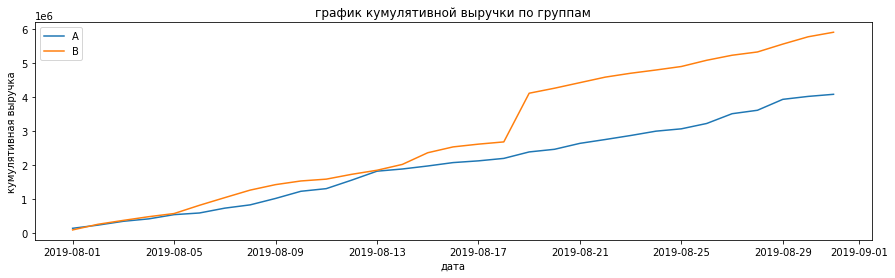

In [14]:
# отделяем группы для построения графика 
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('график кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка')
plt.legend();

Практически с самого начала теста группа В показывала более лучший результат, чем группа А. Однако, в определенный момент произошел резкий скачок в группе В - это могут быть или выбросы, или недостаточное время проведения теста (данные не успели прийти в норму).

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

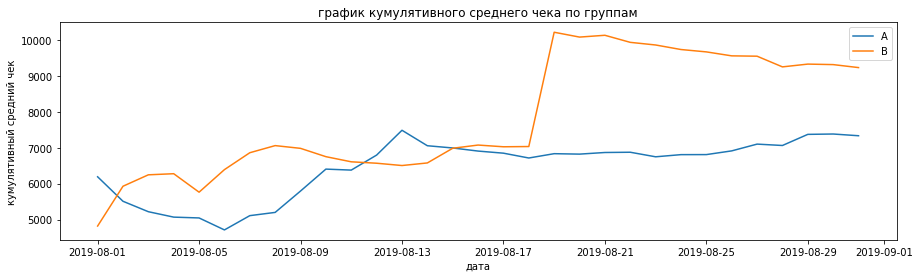

In [15]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек')
plt.legend();

Средний чек группы А был стабильно выше, чем чек группы В. Но тут опять мы видим сильный единоразовый скачок. Кажется, что дело все-таки в выбросах, но утверждать пока мы не можем

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

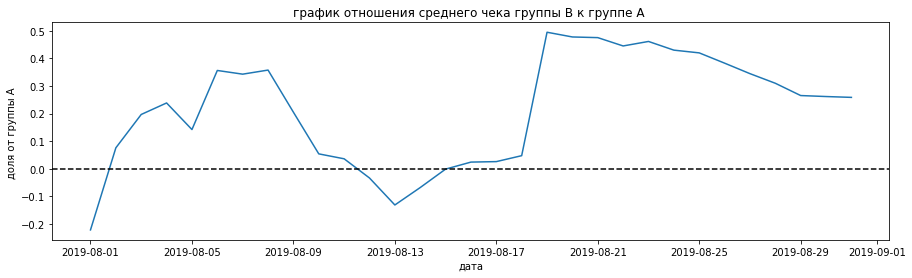

In [16]:
#объединяем таблицы cumulativeRevenueA и umulativeRevenueB

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.title('график отношения среднего чека группы В к группе А ')
plt.xlabel('дата')
plt.ylabel('доля от группы А ');

Данные за период несколько раз колебались. Аномальные продажи точно имеют место быть 

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

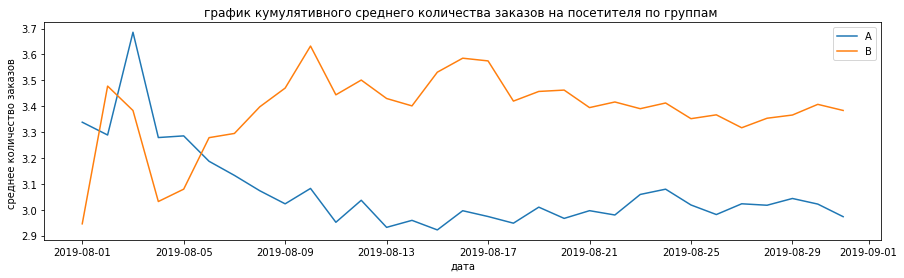

In [17]:
# считаем столб с конверсией (умножаем на 100 для наглдности процентов)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] * 100

# и обновляем все переменные 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам ')
plt.xlabel('дата')
plt.ylabel('среднее количество заказов ')
plt.legend();

Графики двух групп выглядят нормально. Сильный скачок в начале и примерно одинаковые данные после (разница между значениями не превышает 1-2%). Но точно говорить о том, что данные пришли в норму пока нельзя- динамика группы В постепенно снижается. Посмотрим на отношение среднего чека группы В к группе А:

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

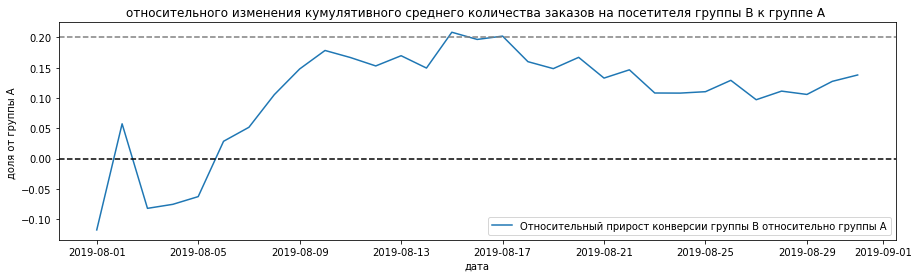

In [18]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']],
                                      left_on='date',
                                      right_on='date',
                                      how='left',
                                      suffixes=['A', 'B']))

fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A ')
plt.xlabel('дата')
plt.ylabel('доля от группы А ')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

Видим, что конверсия группы В росла относительно группы А до 20%, а после начала снижаться 

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

''

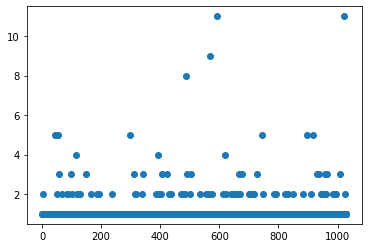

In [19]:
#создаем таблицу, где посчитано сколько раз каждый уникальный пользователей совершил заказов 

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['transactionId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x = x_values, y = ordersByUsers['orders'] )
;

Пользователи в среднем совершают заказы  1 или 2, а, возможно, и 3 раза, но не совсем понятно, какое кол-во заказов считается хоть и высоким, но в пределах нормы, а какое - выбросом 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [20]:
np.percentile(ordersByUsers['orders'], [95,99]) 

array([2., 4.])

Менее 5% пользователей совершили более 2х заказов, менее 1% - 4. Устанавливаем верхнюю границу в 2 заказа 

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

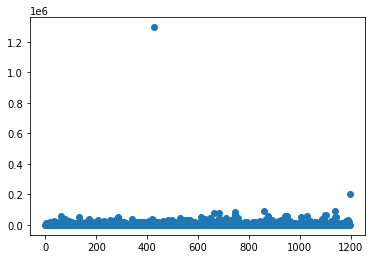

In [21]:

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']);

По графику опять-таки, сложно понять, где прилегает верхняя граница нормы. Рассмотрим ее через перцентили 

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [22]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Верхней границей устанавливаем сумму заказа - 28000, так как менее 5% пользователей совершили заказ на более высокую сумму 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Для того, чтобы выполнить следующие шаги, необходимо опять подготовить данные:

In [23]:
# создаем новые df по каждой группе, где есть информация о дате и посетителях в эту дату 

# А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# считаем кол-во пользователей на каждй день (кумулятивно)

# А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# опять создаем df по группам, но уже с заказами и выручкой 
# А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#считаем кумулятивную выручку по дням и пользователям 

# А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# создаем df где соединяем все это в одну таблицу 
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь рассчитаем статистическую значимость. Сразу обозначим нулевую и альтернативную гипотезу:

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия  есть.

In [24]:
# df с пользователями, которые совершили хотя бы 1 заказ с их кол-ми заказов 
# A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
# B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders']
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                name='orders')],axis=0) 

display("P-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

"Oтносительное различие в среднем между группами {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'P-value 0.017'

'Oтносительное различие в среднем между группами 0.138'

P-value меньше 0.05, значит, нулевая гипотеза  отвергнута - различия между группами есть 
Относительное различие между "сырыми" группами 13,8 % - видимо, этого достаточно, чтобы признать имеющиеся данные различными 

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Устанавливаем гипотезы:

Нулевая: различий в среднем чеке между группами нет

Альтернативная:  между группами есть различия 

In [25]:
display('P-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                            orders[orders['group']=='B']['revenue'])[1]))

'Oтносительное различие в среднем между группами {0:.3f}'.format(orders[orders['group']=='B']['revenue']
                                                                 .mean()/orders[orders['group']=='A']['revenue']
                                                                 .mean()-1)

'P-value 0.729'

'Oтносительное различие в среднем между группами 0.259'

Статистических значимых отклонений между данными нет, P-value  больше 0,05 , значит, нулевую гипотезу мы не можем отклонить. Относительное различие  между группами составляет 26% - данное различие не является статичтически значимым, поскольку нулевая гипотеза не отвергнута 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Напомним гипотезы: 

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия есть.

In [26]:
# 'чистим' данные от выбросов 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange( data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',),],axis=0,)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']) ),
            name='orders',),],axis=0,) 


display('P-value {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
'Oтносительное различие в среднем между группами {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'P-value 0.01304'

'Oтносительное различие в среднем между группами 0.173'

Итог не изменился: нулевая гипотеза отвергнута в пользу альтернативной - данные различны между собой. P-value стал еще меньше (от 0.017 до 0.013), а, значит, данные без выбросов еще больше отличаются друг от друга. Относительное значение повысилось с 13% до 17%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.


Нулевая: различий в среднем чеке между группами нет

Альтернативная: между группами есть различия

In [27]:
display(
    'P-value {0:.3f}'.format(stats.mannwhitneyu(
            orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
            ]['revenue'],
            orders[ np.logical_and( orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
            ]['revenue'],)[1]))


"Oтносительное различие в среднем между группами {0:.3f}".format(orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1)


'P-value 0.738'

'Oтносительное различие в среднем между группами -0.020'

Нулевую гипотезу опять не удалось отвергнуть - различий в среднем чеке между группами нет. P-value выше 0.05